# CDC Diabetes Health Indicators

📊 EDA and 🧠 Model Training using the [CDC Diabetes Health Indicators dataset](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators).

Please refer to [README.md](README.md) in the base directory which contains all relevant project. There the following information is covered:

1. Introduction to problem and task
1. Information about the dataset
1. Instruction to setup the virtual environment for running this Jupyter notebook


In this notebook we will perform the following steps:

1. Load the dataset
1. Perform Exploratory Data Analysis (EDA)
1. Train various models to predict the diabetes status of a patient: (pre-)diabetic or not


## Downloading the dataset

**Data download used in this project**

- ✅ In this project the `ucimlrepo` will be used to download the dataset and all relevant metadata. 

- 💾 The dataset's dataframe as well as all other relevant data will be stored in the [./dataset](dataset) folder locally. 

- 💡 Downloading and then reusing the downloaded data instead of redownloading it using the `ucimlrepo` package done to ensure reproducibility of the project in case the dataset is not available anymore or changes over time.

- 🐍 Python API using the `ucimlrepo` package, the code below is provided by the dataset page:

    ```python
    from ucimlrepo import fetch_ucirepo 
    # fetch dataset 
    cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
    # data (as pandas dataframes) 
    X = cdc_diabetes_health_indicators.data.features 
    y = cdc_diabetes_health_indicators.data.targets 
    # metadata 
    print(cdc_diabetes_health_indicators.metadata) 
    # variable information 
    print(cdc_diabetes_health_indicators.variables) 
    ```

- 📄 The metadata of the downloaded dataset, using the code above, includes a download link for the dataset in CSV format. However, no additional information is provided along with the CSV file: https://archive.ics.uci.edu/static/public/891/data.csv. But the information needed can be accessed from the metadata.


**Data downloaded and stored in this project**

📂 The dataset and parts of the metadata is downloaded and stored in the [./dataset](dataset) folder locally.

- dataframe - [./dataset/data.csv](dataset/data.csv)
- information about variables - [./dataset/variables.csv](dataset/variables.csv)
- metadata (only some parts of it) - [./dataset/metadata_partially.json](dataset/metadata_partially.json)

**Further information on the dataset**

ℹ️ More information about the features will be revealed after downloading the dataset and revealing the dataset's metadata.

In [1]:
## Import of all required libraries
import os
import json
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from IPython.utils.capture import capture_output
from IPython.display import display


Defining variables for downloading and storing the dataset.

In [2]:
path_dir = './dataset'
# data set id of the cdc diabetes health indicators
dataset_id = 891
path_dataset = os.path.join(path_dir, 'data.csv')
path_variables = os.path.join(path_dir, 'variables.csv')
path_metadata = os.path.join(path_dir, 'metadata_partially.json')

💡 The variables below have only been set to `True` once for downloading all relevant data in cell after it. 
Afterwards they were set to `False` to avoid downloading the data again. 

Please keep them set to **`False`** for reproduding the results presented in this notebook, as it can not be assured that the dataset from the download page might change over time or might not be available for download any longer.

The dataset downloaded locally has the following metadata information: `"last_updated": "Wed Sep 27 2023"`

In [3]:
# Data has already been downloaded and saved as json and csv.
# Therefore both variable can be set to False.
# Value True was only used for initial download.

# modify only in case of downloading again
download = False
# only used for writing additional information to local files 
write_files = False

In [4]:
if download:
    cdc_diabetes_health_indicators = fetch_ucirepo(id=dataset_id)
    
    # create dataframe from data and targets
    X = cdc_diabetes_health_indicators.data.features
    y = cdc_diabetes_health_indicators.data.targets
    ids = cdc_diabetes_health_indicators.data.ids
    df = pd.concat([ids, y, X], axis=1)
    df.set_index('ID', inplace=True)
    df = pd.concat([ids, y, X], axis=1)

    # read variables dataframe containing information about the variables
    variables = cdc_diabetes_health_indicators.variables

    print("keys:\n", cdc_diabetes_health_indicators.keys())
    print("metadata keys:\n", cdc_diabetes_health_indicators.metadata)
    display(cdc_diabetes_health_indicators.variables)
    if write_files:
        os.makedirs(path_dir, exist_ok=True)

        df.to_csv(path_dataset, index=False)
        cdc_diabetes_health_indicators.variables.to_csv(
            path_variables, index=False)
        # write the following to a json file
        json_data = {}
        json_data['keys'] = list(cdc_diabetes_health_indicators.keys())
        json_data['metadata_keys'] = list(cdc_diabetes_health_indicators.metadata.keys())
        json_data['data'] = {'headers': cdc_diabetes_health_indicators.data.headers.tolist(),}
        json_data['variables'] = 'see ./variables.csv for more information' 
        json_data['metadata'] = dict(cdc_diabetes_health_indicators.metadata)

        with open(path_metadata, 'w') as f:
            f.write(json.dumps(json_data, indent=2))
else:
    df = pd.read_csv(path_dataset, index_col='ID')
    variables = pd.read_csv(path_variables)


Checking the head of the dataframe. The `ID` is the patient ID and the first column `Diabetes_binary` is the target variable indicating (pre-)diabetes or not.
- `0` indicates no diabetes
- `1` indicates (pre-)diabetes

In [5]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
ID,,,,,,,,,,,,,,,,,,,,,
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


---
## Information about the dataset

In the metadata there is an additional dataframe provided which contains information about the features. The dataframe is stored in the `variables` attribute of the metadata.

In [6]:
display(variables)

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,NaN,Patient ID,NaN,no
1,Diabetes_binary,Target,Binary,NaN,0 = no diabetes 1 = prediabetes or diabetes,NaN,no
2,HighBP,Feature,Binary,NaN,0 = no high BP 1 = high BP,NaN,no
3,HighChol,Feature,Binary,NaN,0 = no high cholesterol 1 = high cholesterol,NaN,no
4,CholCheck,Feature,Binary,NaN,0 = no cholesterol check in 5 years 1 = yes ch...,NaN,no
5,BMI,Feature,Integer,NaN,Body Mass Index,NaN,no
6,Smoker,Feature,Binary,NaN,Have you smoked at least 100 cigarettes in you...,NaN,no
7,Stroke,Feature,Binary,NaN,(Ever told) you had a stroke. 0 = no 1 = yes,NaN,no
8,HeartDiseaseorAttack,Feature,Binary,NaN,coronary heart disease (CHD) or myocardial inf...,NaN,no
9,PhysActivity,Feature,Binary,NaN,physical activity in past 30 days - not includ...,NaN,no


### Variables (Target and Features)

The dataset has a column ID which is the patient ID.

| ID | Type | Description | 
| --- | --- | --- |
| ID | Integer | Patient ID |


The target column is `Diabetes_binary` which indicates (pre-)diabetes or not.

| Target | Type | Description | 
| --- | --- | --- |
| Diabetes_binary | Binary | 0 = no diabetes<br>1 = prediabetes or diabetes |

There are 21 feature available in the dataset sorted in the table below using their data type:
- Integer
- Categrical
- Binary

> Information for binary features (except for feature `Sex`):
> - `0` = `no` 
> - `1` = `yes`

| Features | Type | Description | 
| --- | --- | --- |
| BMI | Integer | Body Mass Index |
| MentHlth | Integer | Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days |
| PhysHlth | Integer | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days |
|  |  |  |
| GenHlth | Integer (Categorical) | Would you say that in general your health is: scale 1-5<br>1 = excellent<br>2 = very good<br> 3 = good<br> 4 = fair<br> 5 = poor |
| Age | Integer (Categorical) | Age,13-level age category (_AGEG5YR see codebook)<br>1 = 18-24<br>9 = 60-64<br> 13 = 80 or older |
| Education | Integer (Categorical) | Education level (EDUCA see codebook) scale 1-6<br>1 = Never attended school or only kindergarten<br>2 = Grades 1 through 8 (Elementary)<br>3 = Grades 9 through 11 (Some high school)<br>4 = Grade 12 or GED (High school graduate)<br>5 = College 1 year to 3 years (Some college or technical school)<br>6 = College 4 years or more (College graduate) |
| Income | Integer (Categorical) | Income scale (INCOME2 see codebook) scale 1-8<br> 1 = less than $10,000<br> 5 = less than $35,000<br> 8 = $75,000 or more" |
|  |  |  |
| Sex | Binary | Sex, 0 = female 1 = male |
| HighBP | Binary | High blood preasure |
| HighChol | Binary | High cholesterol |
| CholCheck | Binary | Cholesterol check in 5 years |
| Smoker | Binary | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] |
| Stroke | Binary | (Ever told) you had a stroke. |
| HeartDiseaseorAttack | Binary | Coronary heart disease (CHD) or myocardial infarction (MI) |
| PhysActivity | Binary | Physical activity in past 30 days - not including job< |
| Fruits | Binary | Consume Fruit 1 or more times per day |
| Veggies | Binary | Consume Vegetables 1 or more times per day |
| HvyAlcoholConsump | Binary | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)|
| AnyHealthcare | Binary | "Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. |
| NoDocbcCost | Binary | Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? |
| ffWalk | Binary | Do you have serious difficulty walking or climbing stairs? |




Check how the data is stored in the dataframe, what kind of datatypes are used.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-null  

From the the output we can see that all datatypes are stored as `int64` (target variable as well as feature variables).

✂️ Creating separate variables for the different types of columns:

- `target_name` - variable for target name
- `feature_names_binary` - list of binary feature names
- `feature_names_categorical` - list of categorical feature names
- `feature_names_integer` - list of integer feature names

💡 Data type can stay `int64` for all columns. Going to apply OneHotEncoding to all categorical columns later.

In [8]:
target_name = 'Diabetes_binary'
feature_names_binary = [
    'Sex', 
    'HighBP', 
    'HighChol', 
    'CholCheck', 
    'Smoker', 
    'Stroke', 
    'HeartDiseaseorAttack',
    'PhysActivity',
    'Fruits',
    'Veggies',
    'HvyAlcoholConsump',
    'AnyHealthcare',
    'NoDocbcCost',
    'DiffWalk',
]
feature_names_integer = ['BMI']
feature_names_categorical = ['GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

feature_names = feature_names_binary + feature_names_integer + feature_names_categorical

Using assertions to check if the data columns have been split correctly into `Binary`, `Categorical` and `Integer`.

- Checking that the sum of values in the `feature_<type>` lists is equal to the number of columns in the data frame
- Checking that the `feature_<type>` lists do not overlap
- Checking that the `feature_<type>` lists contain all columns of the data frame

✅ If there is no assertion error, all column names have been split correctly.

In [9]:
# create assert in case column numbers do not match
len_all_features = len(feature_names_binary) + len(feature_names_integer) + len(feature_names_categorical)
assert df.columns.size == len_all_features + 1, \
    f'Number of columns in dataframe ({df.columns.size}) does not match the number of features ({len_all_features + 1})'

In [10]:
# create asssert in case names overlap
set_binary_intersect_integer = set(feature_names_binary).intersection(set(feature_names_integer))
set_binary_intersect_categorical = set(feature_names_binary).intersection(set(feature_names_categorical))
set_integer_intersect_categorical = set(feature_names_integer).intersection(set(feature_names_categorical))


assert target_name not in set_binary_intersect_integer, \
    f'Features overlap between binary and integer features: {set_binary_intersect_integer}'
assert target_name not in set_binary_intersect_categorical, \
    f'Features overlap between binary and categorical features: {set_binary_intersect_categorical}'
assert target_name not in set_integer_intersect_categorical, \
    f'Features overlap between integer and categorical features: {set_integer_intersect_categorical}'

assert set_binary_intersect_integer == set(), \
    f'Features overlap between binary and integer features: {set_binary_intersect_integer}'
assert set_binary_intersect_categorical == set(), \
    f'Features overlap between binary and categorical features: {set_binary_intersect_categorical}'
assert set_integer_intersect_categorical == set(), \
    f'Features overlap between integer and categorical features: {set_integer_intersect_categorical}'

In [11]:
# create assert in case target column is not in dataframe
set_diff = set(df.columns).difference(set([target_name]+feature_names))
assert set_diff == set(), \
    f'Dataframe contains columns not covered by the other variables: {set_diff}'

---

## Data Set Information

Checking basics dataset for
- unique values
- missing values
- duplicates

In [12]:
df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

It is said that the dataset has no missing values, but checking to be sure.

In [13]:
indices_issnull = df.isnull().any()
print(f"Missing data: {'Yes' if indices_issnull.any() else 'No'}")

Missing data: No


✅ As was stated in the dataset page information there are no missing values in the dataframe.

On the dataset page it is stated that each row in the dataset represents a person participating in the study.
The patient ID, is used as dataframe index. We are now checking, if there are duplicate rows (not including the ID) and explain how we are going to handle them.

In [14]:
indices_duplicates = df.duplicated(keep='first')
num_total = len(df)
num_duplicates = indices_duplicates.sum()
print(f"Total number of rows: {num_total:7d}")
print(f"Number of duplicates: {num_duplicates:7d}")
print(f"Percentage of duplicates: {num_duplicates/num_total:.2%}")

Total number of rows:  253680
Number of duplicates:   24206
Percentage of duplicates: 9.54%


**Oberservation:**  There are almost 10% of duplicate rows (excluding the patient ID) in the dataset.

**Explanation:**
💡 Except for the `BMI` feature, which is only stored as `Integer`, the dataset consists of only `Binary` and `Categorical` features. This means that the duplicate rows are not duplicate patients, but different patients displaying the same values for all features due to the nature of the data types.

**Additional Information:** The [BMI (body mass index)](https://en.wikipedia.org/wiki/Body_mass_index) is calculated using the following formula below. The result is a floating point number, but in the dataset the BMI is stored as an integer. This means that the BMI is rounded to the next integer. 

$$
BMI = \frac{mass_{kg}}{height_{m}^2}
$$

**Handling:** We are now going to check, if the patient IDs are unique, comparing the index length with the number of unique patient IDs.





In [15]:
# We are now going to check, if the patient IDs are unique, comparing the index length with the number of unique patient IDs.
print(f"{df.index.nunique()} unique patient IDs")
print(f"{len(df)} rows in total")

assert df.index.nunique() == len(df), "Patient IDs are not unique"

253680 unique patient IDs
253680 rows in total


✅ The patient IDs are unique, so we can keep the duplicate rows in the dataset. As these are just patients displaying the same values for all features due to the nature of the data types.

❗Before investigating the dataset any further, we will now split the dataset into a training, validation and test set. All further investigation will be done on the training set only. As we must never investigate the validation and test set to avoid overfitting.

---

## Splitting into Train and Test
- ℹ️ If there is no separate test datasset available, it is important to split the data into `test` and `train` (including `val`). Before analyzing the data any further.
    - 60% `train`
    - 20% `val`
    - 20% `test`

- 💡Using a seed point (`random_state`) to make sure the split is reproducible.

In [16]:
# using a seed point to make the split reproducible
seed = 42
frac_train = 0.6
frac_val = 0.2
frac_test = 0.2
df_train, df_test = train_test_split(df, test_size=frac_test, random_state=seed, shuffle=True)
df_train, df_val = train_test_split(df_train, test_size=frac_val/frac_train, random_state=seed, shuffle=True)

overall_len = len(df_train) + len(df_val) + len(df_test)    
overall_len == len(df)

True

💾 Storing the splits so they can get reused later on.

In [17]:
df_train.to_csv(os.path.join(path_dir, 'split_train.csv'))
df_val.to_csv(os.path.join(path_dir, 'split_val.csv'))
df_test.to_csv(os.path.join(path_dir, 'split_test.csv'))

---

## Exploratory Data Analysis (EDA) - ❗ on training split only❗

As we must never investigate our `test` split, we are going to do the EDA on the `train` split.

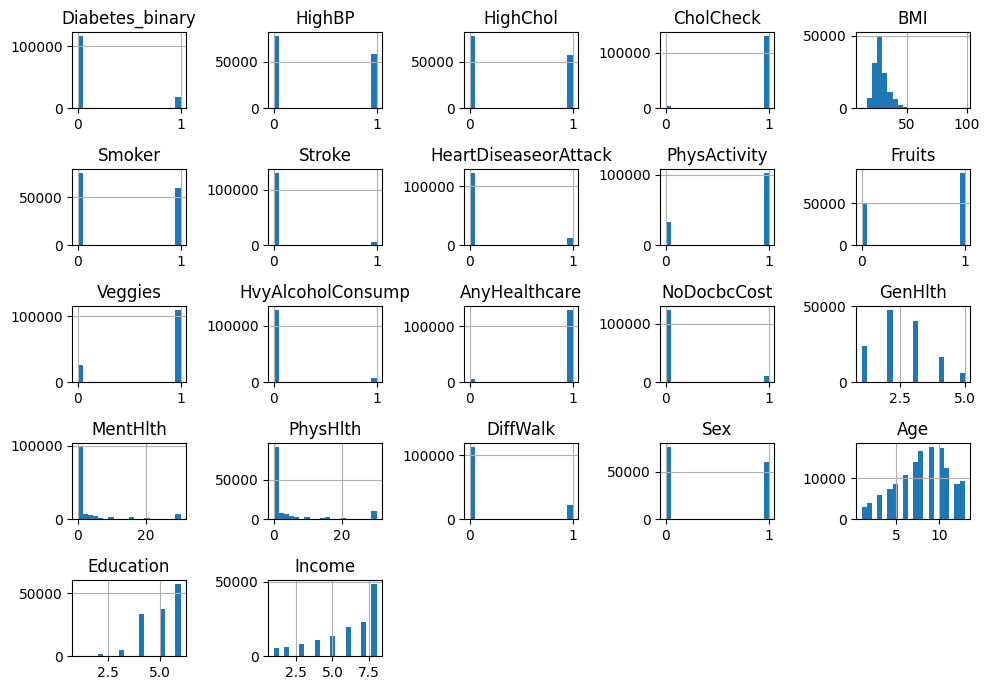

In [18]:
ax = df_train.hist(figsize=(10, 7), bins=20)
plt.tight_layout()
plt.show()

⚖️ Regarding the target variable `Diabetes_binary` it can be seen that the data is imbalanced. There are more healthy people than people with diabetes. This is important to keep in mind when training and evaluating the model.

Using the histogram plot we get a first impression of the distribution of the data. We are now going to look deeper into the values of the features investigating them separately regarding type (binary, categorical, integer).

In [21]:
# create variables for the binary features for better annotation in the figures
feature_names_sex = ['Sex']
feature_names_binary_yn = feature_names_binary.copy()
feature_names_binary_yn = list(set(feature_names_binary).difference(set(feature_names_sex)))

# create temporary dataframe for plotting purposes and map the binary features to yes/no
# map sex to female and male for 0 and 1 respectively
df_train_plot = df_train.copy(deep=True)
df_train_plot[feature_names_binary_yn] = df_train_plot[feature_names_binary_yn].replace({0: 'No', 1: 'Yes'})
df_train_plot[feature_names_sex] = df_train_plot[feature_names_sex].replace({0: 'Female', 1: 'Male'})
df_train_plot[target_name] = df_train_plot[target_name].replace({0: 'No', 1: 'Yes'})


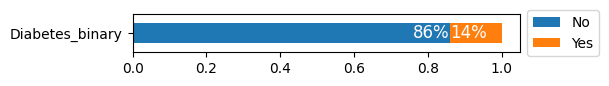

In [68]:
df_tmp_target = df_train_plot[[target_name]].apply(pd.Series.value_counts, normalize=True).T.round(2)
df_tmp_target.plot(kind='barh', stacked=True, figsize=(5, 0.5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# annotate the figure with the percentages
plt.annotate(
    f"{df_tmp_target.iloc[0]['Yes']:.0%}", 
    xy=(0.5, 0), xytext=(1-df_tmp_target.iloc[0]['Yes'], 0), ha='left', va='center', color='white', size=12)
plt.annotate(
    f"{df_tmp_target.iloc[0]['No']:.0%}", 
    xy=(0.5, 0), xytext=(df_tmp_target.iloc[0]['No'], 0), ha='right', va='center', color='white', size=12)

plt.show()


⚖️ High imbalance for the target variable❗

In [58]:
df_tmp_target.iloc[0]['Yes']

0.14

In [32]:
df_train_plot[feature_names_binary_yn].apply(pd.Series.value_counts, normalize=True).T.round(2)

,No,Yes
NoDocbcCost,0.92,0.08
HeartDiseaseorAttack,0.91,0.09
Fruits,0.37,0.63
HvyAlcoholConsump,0.94,0.06
AnyHealthcare,0.05,0.95
Stroke,0.96,0.04
Smoker,0.56,0.44
HighChol,0.57,0.43
HighBP,0.57,0.43
DiffWalk,0.83,0.17


In [126]:
# # import mtick for percentage formatting
# import matplotlib.ticker as mtick
# fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))
# # thick bars

# # make it percentage based, normalize using apply
# df_train_plot[feature_names_binary_yn].apply(pd.Series.value_counts, normalize=True).T.plot.barh(
#     stacked=True, sharey=False, ax=ax1, width=0.8)
# df_train_plot[feature_names_sex].apply(pd.Series.value_counts, normalize=True).T.plot.barh(
#     stacked=True, sharey=False, ax=ax2)

# # make xaxis visible from 0 to 1
# for ax in [ax1, ax2]:
#     #iterate over two patches at the same time
#     for p_no, p_yes in zip(ax.patches[::2], ax.patches[1::2]):
#         width_no = p_no.get_width()
#         width_yes = p_yes.get_width()
#         ax.annotate(
#             f'{width_no:.0%}', 
#             xy=(0.5, p_no.get_y() + p_no.get_height() / 2), 
#             xytext=(p_no.get_width(), p_no.get_y() + p_no.get_height() / 2), 
#             # textcoords='offset points',
#             ha='right', va='center', color='white', size=12)
#         # ax.annotate(
#         #     f'{width_yes:.0%}', 
#         #     xy=(width_yes, p_yes.get_y() + p_yes.get_height() / 2), 
#         #     xytext=(0, 0), textcoords='offset points', ha='left', va='center')


#     # ax.annotate(
#     #     f"{df_train_plot.iloc['Yes']:.0%}", 
#     #     xy=(0.5, 0), xytext=(1-df_train_plot['Yes'], 0), ha='left', va='center', color='white', size=12)
#     # plt.annotate(
#     #     f"{df_train_plot['No']:.0%}", 
#     #     xy=(0.5, 0), xytext=(df_train_plot['No'], 0), ha='right', va='center', color='white', size=12)
#     ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)
#     ax.set_xlim(0, 1)
#     ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
#     ax.grid(axis='x')
#     ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
#     ax.set_axisbelow(True)




In [ ]:
df_train_plot[feature_names_sex].apply(pd.Series.value_counts, normalize=True).T.round(2)

♀️/♂️ **Sex**: The dataset contains slightly more female patients than male patients.This is important to keep in mind when training and evaluating the model. The goal would be to achieve the same performance for both genders. 

In [127]:
df_train_plot[feature_names_binary_yn].apply(pd.Series.value_counts, normalize=True).T.round(2).style.background_gradient(cmap='Blues')

,No,Yes
NoDocbcCost,0.920000,0.080000
HeartDiseaseorAttack,0.910000,0.090000
Fruits,0.370000,0.630000
HvyAlcoholConsump,0.940000,0.060000
AnyHealthcare,0.050000,0.950000
Stroke,0.960000,0.040000
Smoker,0.560000,0.440000
HighChol,0.570000,0.430000
HighBP,0.570000,0.430000
DiffWalk,0.830000,0.170000


Some of the binary variables are not balanced, meaning that there are more patients with `0` (no) than with `1` (yes) for the following features:
<!-- - `HighChol`
- `CholCheck`
- 'Veggies -->


In [ ]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# seaborn grouped barplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()
for ax, feature_name in zip(axes, feature_names_binary_yn):
    sns.countplot(x=feature_name, hue=target_name, data=df_train_plot, ax=ax)
    ax.set_xlabel(feature_name)
    ax.set_ylabel('Count')
    ax.legend(title=target_name)

plt.tight_layout()
plt.show()


In [ ]:
# create two plots side by side sharing the same y-axis


In [ ]:
df_train_plot[feature_names_binary].value_counts() 

# Aggregate the data to get counts and make it percentage


# agg_data = df_train_plot[feature_names_binary].apply(lambda x: x.value_counts()).T / len(df_train)

# # # make two plots side by side one for sex and one for the other binary features
# # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
# # agg_data.loc[feature_name_sex].plot(kind='bar', ax=ax1)

# # Create a bar plot from the aggregated data
# ax = agg_data.plot(kind='bar', figsize=(12, 5))
# for i, p in enumerate(ax.patches):
#     # depending on the position of the bar, the annotation is placed differently
#     ax.annotate(
#         f'{p.get_height():.0%}', 
#         (p.get_x(), p.get_height()+0.01), 
#         ha='left',
#         va='bottom',
#         rotation=90)

# center ticks for x-axis labels 
# ax.set_xticklabels(ax.get_xticklabels(), ha='left', rotation=90)

# ax.set_ylim([0, 115])
# # make the area between 1.0 and 1.2 transparent
# ax.axhspan(100, 120, alpha=0.5, color='lightgrey')
# # indicate 50% on y-axis with background color for 50%
# ax.axhspan(0, 50, alpha=0.5, color='lightgrey')

# ax.set_xlabel('Binary features')
# ax.set_ylabel('Percentage')
# ax.set_title('Binary Data Distribution')
# ax.yaxis.grid(True)
# ax.set_axisbelow(True)
# plt.tight_layout()
# plt.show()


In [ ]:
# bar plot for binary features
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
axes = axes.flatten()
for i, feature in enumerate(feature_names_binary):
    df_train[feature].value_counts().plot(kind='bar', ax=axes[i], title=feature)
plt.tight_layout()
plt.show()


In [ ]:
# correlation matrix, abbreviate the column names for better readability
corr_matrix = df_train.corr()
# set upper triangle to nan incluing the diagonal
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_matrix = corr_matrix.mask(mask)
corr_matrix_short_names = corr_matrix.rename(columns=lambda x: f'{x[:5]}...' if len(x) > 8 else x)
display(corr_matrix_short_names.style.background_gradient(cmap='seismic', axis=None, vmin=-1, vmax=1))


In [ ]:
# plot correlation matrix using seaborn
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, ax=ax, cmap='seismic', fmt='.2f', vmin=-1, vmax=1)
plt.show()

Display features with highest pairwise correlation.

In [ ]:
# list all pairs of columns by their abslute correlation value, add the absolute correlation value
corr_matrix_abs = corr_matrix.abs()

corr_matrix_abs = corr_matrix_abs.unstack()
corr_matrix_abs = corr_matrix_abs.sort_values(ascending=False)
# corr_matrix_abs = corr_matrix_abs[corr_matrix_abs != 1]
corr_matrix_abs = corr_matrix_abs.reset_index()
corr_matrix_abs.columns = ['feature_1', 'feature_2', 'abs_corr']
corr_matrix_abs.dropna(how='any', axis=0, inplace=True)
corr_matrix_abs.head(10)


In [ ]:
# from scipy.stats import boxcox
# normalized_data = boxcox(df.Solids)
# sns.distplot(normalized_data[0], label='boxcox')
# plt.legend()

In [ ]:
# solids_norm = (df.Solids-df.Solids.mean())/df.Solids.std()
# sns.distplot(df.Solids, label='orig')
# plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.inspection import permutation_importance
from sklearn.inspection import permutation_importance


In [ ]:
def print_metrics(y_val, y_pred):
    # overall accuracy
    accuracy = accuracy_score(y_val, y_pred)
    print("Accuracy:", accuracy)
    # calculate accuracy for each of the both classes separately
    accuracy_class_0 = accuracy_score(y_val[y_val==0], y_pred[y_val==0])
    accuracy_class_1 = accuracy_score(y_val[y_val==1], y_pred[y_val==1])
    print("Accuracy class 0:", accuracy_class_0)
    print("Accuracy class 1:", accuracy_class_1)
    # print the classification report
    print("Classification report:\n", classification_report(y_val, y_pred))
    # print the confusion matrix
    print("Confusion matrix:\n", confusion_matrix(y_val, y_pred))
    print("Confusion matrix normalized:\n", confusion_matrix(y_val, y_pred, normalize='true'))

def plot_confusion_matrix(y_val, y_pred):
    # plot confusion matrix and normalized confusion matrix side by side
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    cm = confusion_matrix(y_val, y_pred)
    cm_norm = confusion_matrix(y_val, y_pred, normalize='true')
    ax[0].set_title('Confusion Matrix')
    ax[1].set_title('Normalized Confusion Matrix')
    ConfusionMatrixDisplay(cm).plot(ax=ax[0])
    ConfusionMatrixDisplay(cm_norm).plot(ax=ax[1])
    plt.show()

def plot_roc_and_precision_recall_curve(y_val, y_pred_proba):
    # plot roc curve and precision recall curve side by side
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot(ax=ax[0])
    ax[0].plot([0, 1], [0, 1], 'k--')
    ax[0].set_title('ROC Curve')
    ax[0].legend(loc="lower right")

    precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba)
    average_precision = average_precision_score(y_val, y_pred_proba)
    PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=average_precision).plot(ax=ax[1])
    ax[1].set_title('Precision Recall Curve')
    ax[1].legend(loc="lower left")
    plt.show()

def plot_feature_importance(model, X_train, y_train):
    # plot the feature importance
    result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=seed)
    sorted_idx = result.importances_mean.argsort()
    fig, ax = plt.subplots(figsize=(12,5))
    ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_train.columns[sorted_idx])
    ax.set_title("Permutation Importances (train set)")
    fig.tight_layout()
    plt.show()

In [ ]:
# training a logistic regression model

# define the target column
target_column = 'Diabetes_binary'
# define the feature columns
feature_columns = [col for col in df.columns if col != target_column]

# split the data into train and val data
X_train = df_train[feature_columns]
y_train = df_train[target_column]
X_val = df_val[feature_columns]
y_val = df_val[target_column]

class_weight = len(y_train) / np.bincount(y_train)
class_weight = {0: class_weight[0], 1: class_weight[1]}

In [ ]:
# create the model
model = LogisticRegression(random_state=seed, max_iter=1000)
# train the model
model.fit(X_train, y_train)
# predict the target values
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:,1]

print_metrics(y_val, y_pred)
plot_confusion_matrix(y_val, y_pred)
plot_roc_and_precision_recall_curve(y_val, y_pred_proba)
plot_feature_importance(model, X_train, y_train)

---

In [ ]:
# create the model
model = LogisticRegression(random_state=seed, max_iter=1000, class_weight='balanced')
# train the model
model.fit(X_train, y_train)
# predict the target values
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:,1]

print_metrics(y_val, y_pred)
plot_confusion_matrix(y_val, y_pred)
plot_roc_and_precision_recall_curve(y_val, y_pred_proba)
plot_feature_importance(model, X_train, y_train)

----

In [ ]:

# create the model
model = LogisticRegression(random_state=seed, max_iter=1000, class_weight=class_weight)
# train the model
model.fit(X_train, y_train)
# predict the target values
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:,1]

print_metrics(y_val, y_pred)
plot_confusion_matrix(y_val, y_pred)
plot_roc_and_precision_recall_curve(y_val, y_pred_proba)
plot_feature_importance(model, X_train, y_train)

In [ ]:
# plot roc curve and precision recall curve side by side    
fig, ax = plt.subplots(1,2, figsize=(10,4))
#determine sample weights for roc curve
sample_weight = np.ones(len(y_val))
sample_weight[0] = 1/sum(y_val==0)
sample_weight[1] = 1/sum(y_val==1)

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba, sample_weight=sample_weight)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot(ax=ax[0])
ax[0].plot([0, 1], [0, 1], 'k--')
ax[0].set_title('ROC Curve')
ax[0].legend(loc="lower right")

precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba, sample_weight=sample_weight)
average_precision = average_precision_score(y_val, y_pred_proba)
PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=average_precision).plot(ax=ax[1])
ax[1].set_title('Precision Recall Curve')
ax[1].legend(loc="lower left")
plt.show()


sample_weight